In [6]:
import openml

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Settings for plots
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

In [8]:
# Download the dataset from OpenM
df = openml.datasets.get_dataset(42721, version=1)

In [10]:
# Extract the dataframe
df, *_ = df.get_data()

In [11]:
print(df.shape)
df.head()


(1000000, 10)


,DepDelay,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,Origin,Dest,Distance
0,8.0,10,11,7,1300.0,1535.0,AA,LAX,HNL,2556.0
1,-3.0,10,10,6,2035.0,2110.0,AA,OGG,HNL,100.0
2,6.0,10,26,1,1200.0,1446.0,AA,JFK,LAX,2475.0
3,1.0,10,9,5,1145.0,1512.0,AA,JFK,SFO,2586.0
4,0.0,10,16,5,930.0,1149.0,AA,SFO,HNL,2399.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   DepDelay       1000000 non-null  float64 
 1   Month          1000000 non-null  uint8   
 2   DayofMonth     1000000 non-null  uint8   
 3   DayOfWeek      1000000 non-null  uint8   
 4   CRSDepTime     1000000 non-null  float64 
 5   CRSArrTime     1000000 non-null  float64 
 6   UniqueCarrier  1000000 non-null  category
 7   Origin         1000000 non-null  category
 8   Dest           1000000 non-null  category
 9   Distance       1000000 non-null  float64 
dtypes: category(3), float64(4), uint8(3)
memory usage: 38.2 MB


In [13]:
df.isnull().sum()

DepDelay         0
Month            0
DayofMonth       0
DayOfWeek        0
CRSDepTime       0
CRSArrTime       0
UniqueCarrier    0
Origin           0
Dest             0
Distance         0
dtype: int64

In [15]:
df.duplicated().sum()

17

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
def convert_to_minutes(time_val):
    """
    Convert HHMM (float) format to minutes since midnight.
    Returns NaN if input is NaN or negative.
    """
    if pd.isnull(time_val) or time_val < 0:
        return np.nan
    hours = int(time_val) // 100
    minutes = int(time_val) % 100
    return hours * 60 + minutes


In [18]:
df['CRSDepMinutes'] = df['CRSDepTime'].apply(convert_to_minutes)
df['CRSArrMinutes'] = df['CRSArrTime'].apply(convert_to_minutes)


In [19]:
df.head()

,DepDelay,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,Origin,Dest,Distance,CRSDepMinutes,CRSArrMinutes
0,8.0,10,11,7,1300.0,1535.0,AA,LAX,HNL,2556.0,780,935
1,-3.0,10,10,6,2035.0,2110.0,AA,OGG,HNL,100.0,1235,1270
2,6.0,10,26,1,1200.0,1446.0,AA,JFK,LAX,2475.0,720,886
3,1.0,10,9,5,1145.0,1512.0,AA,JFK,SFO,2586.0,705,912
4,0.0,10,16,5,930.0,1149.0,AA,SFO,HNL,2399.0,570,709


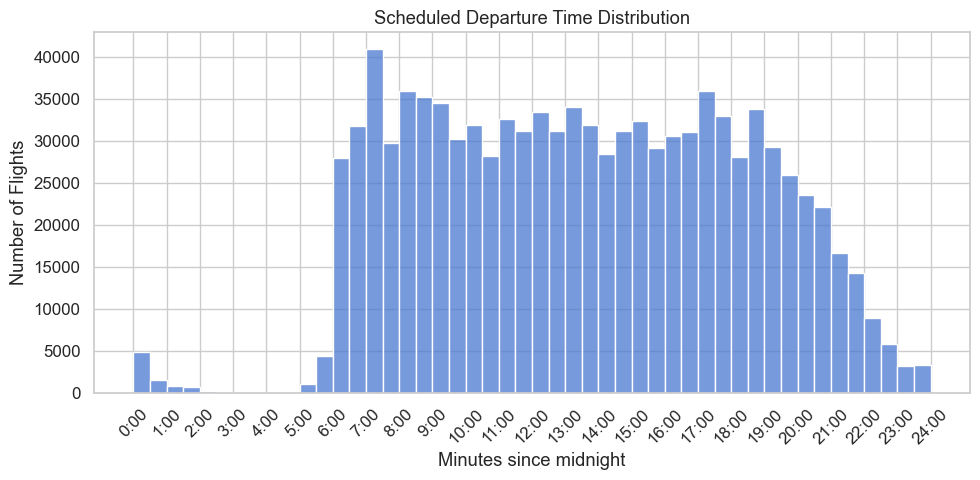

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['CRSDepMinutes'], bins=48, kde=False)
plt.title("Scheduled Departure Time Distribution")
plt.xlabel("Minutes since midnight")
plt.ylabel("Number of Flights")
plt.xticks(ticks=[i * 60 for i in range(0, 25)], labels=[f"{i}:00" for i in range(0, 25)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


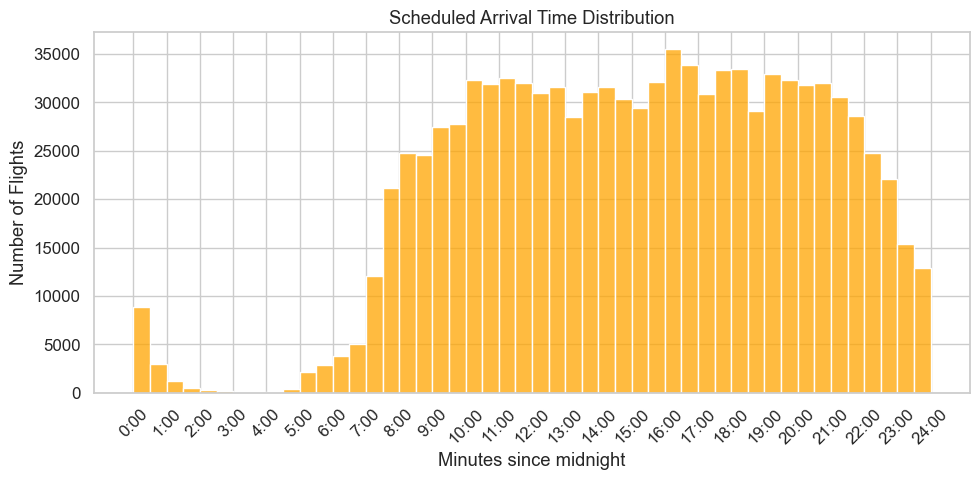

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['CRSArrMinutes'], bins=48, kde=False, color='orange')
plt.title("Scheduled Arrival Time Distribution")
plt.xlabel("Minutes since midnight")
plt.ylabel("Number of Flights")
plt.xticks(ticks=[i * 60 for i in range(0, 25)], labels=[f"{i}:00" for i in range(0, 25)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
df['DepHour'] = df['CRSDepMinutes'] // 60
df['ArrHour'] = df['CRSArrMinutes'] // 60

In [29]:
#df.head()


In [30]:
df['RushHour'] = df['DepHour'].apply(lambda x: 1 if (6 <= x <= 9) or (16 <= x <= 19) else 0)


In [32]:
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)

,DepDelay,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,Origin,Dest,Distance,CRSDepMinutes,CRSArrMinutes,DepHour,ArrHour,RushHour,IsWeekend
0,8.0,10,11,7,1300.0,1535.0,AA,LAX,HNL,2556.0,780,935,13,15,0,1
1,-3.0,10,10,6,2035.0,2110.0,AA,OGG,HNL,100.0,1235,1270,20,21,0,1
2,6.0,10,26,1,1200.0,1446.0,AA,JFK,LAX,2475.0,720,886,12,14,0,0
3,1.0,10,9,5,1145.0,1512.0,AA,JFK,SFO,2586.0,705,912,11,15,0,0
4,0.0,10,16,5,930.0,1149.0,AA,SFO,HNL,2399.0,570,709,9,11,1,0


Text(0.5, 1.0, 'Season Distribution')

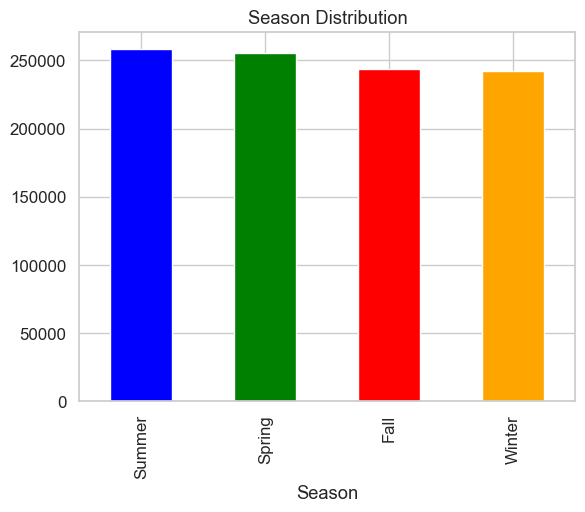

In [34]:
def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(assign_season)
df['Season'].value_counts().plot(kind='bar', color=['blue', 'green', 'red', 'orange'])
plt.title("Season Distribution")

In [36]:
#df[['DepHour', 'RushHour', 'IsWeekend', 'Season']].head()


In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['UniqueCarrier', 'Origin', 'Dest', 'Season']:
    df[col] = label_encoder.fit_transform(df[col])


In [39]:
df.head()

,DepDelay,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,Origin,Dest,Distance,CRSDepMinutes,CRSArrMinutes,DepHour,ArrHour,RushHour,IsWeekend,Season
0,8.0,10,11,7,1300.0,1535.0,1,193,154,2556.0,780,935,13,15,0,1,0
1,-3.0,10,10,6,2035.0,2110.0,1,249,154,100.0,1235,1270,20,21,0,1,0
2,6.0,10,26,1,1200.0,1446.0,1,183,192,2475.0,720,886,12,14,0,0,0
3,1.0,10,9,5,1145.0,1512.0,1,183,307,2586.0,705,912,11,15,0,0,0
4,0.0,10,16,5,930.0,1149.0,1,309,154,2399.0,570,709,9,11,1,0,0


In [40]:
# Remove top 1% extreme delays
threshold = df['DepDelay'].quantile(0.99)
df = df[df['DepDelay'] < threshold]

print(f"Shape after outlier removal: {df.shape}")


Shape after outlier removal: (989886, 17)


In [41]:
df.drop(columns=[
    'CRSDepTime',
    'CRSArrTime',
    'CRSDepMinutes',
    'CRSArrMinutes',
    'Month',
    'DayOfWeek',
    'DayofMonth'
], inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_11524\914003999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=[


In [43]:
# Target variable
y = df['DepDelay']

# Features (drop target)
X = df.drop(columns=['DepDelay'])


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


KeyboardInterrupt: 